In [1]:
import torch 
import torchvision.transforms as transforms 
import torch.nn as nn 
import torch.nn.functional as F 
import numpy as np 
import matplotlib.pyplot as plt 

from torchvision.datasets import CIFAR10 
from torch.utils.data import DataLoader 
from torch.optim import Adam 
import torchvision 

torch.manual_seed(1)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

### Data

In [3]:
compute_transform = transforms.Compose(
    [ 
        transforms.ToTensor()
    ]
)

dataset = CIFAR10(
    root='./data', 
    train=True, 
    transform=compute_transform, 
    download=True
)

loader = DataLoader(
    dataset, 
    batch_size=1024, 
    shuffle=False, 
    num_workers=4
)

mean = 0.0 
for images, _ in loader:
    batch_samples = images.size(0)
    images = images.view(batch_samples, images.size(1), -1)
    mean += images.mean(2).sum(0)
mean = mean / len(loader.dataset)

variance = 0.0 
for images, _ in loader:
    batch_samples = images.size(0)
    images = images.view(batch_samples, images.size(1), -1)
    variance += ((images - mean.unsqueeze(1)) ** 2).sum([0,2])
std = torch.sqrt(variance / (len(loader.dataset)*32*32))

print(mean, std)


Files already downloaded and verified
tensor([0.4914, 0.4822, 0.4465]) tensor([0.2470, 0.2435, 0.2616])


In [4]:
batch_size = 256 
transform = transforms.Compose( 
    [
        transforms.ToTensor(), 
        transforms.Normalize(mean, std)
    ]
)

train_set = CIFAR10(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform
)

val_set = CIFAR10(
    root='./data', 
    train=False, 
    download=True,
    transform=transform
)

trainloader = DataLoader(
    train_set, 
    batch_size=batch_size, 
    shuffle=True, 
    num_workers=4
)

testloader = DataLoader(
    val_set, 
    batch_size=batch_size, 
    shuffle=False, 
    num_workers=4
)

Files already downloaded and verified
Files already downloaded and verified


### Model

In [5]:
class CNNModel(nn.Module):
    def __init__(self, n_classes=10):
        super(CNNModel, self).__init__()
        self.conv_layer1 = nn.Sequential(
            nn.Conv2d(3, 64, 3, stride=1, padding='same'),
            nn.ReLU()
        )
        self.conv_layer2 = nn.Sequential(
            nn.Conv2d(64, 64, 3, stride=1, padding='same'),
            nn.ReLU()
        )
        self.conv_layer3 = nn.Sequential(
            nn.Conv2d(64, 64, 3, stride=1, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        
        self.conv_layer4 = nn.Sequential(
            nn.Conv2d(64, 128, 3, stride=1, padding='same'),
            nn.ReLU(),
        )
        self.conv_layer5 = nn.Sequential(
            nn.Conv2d(128, 128, 3, stride=1, padding='same'),
            nn.ReLU(),
        )
        self.conv_layer6 = nn.Sequential(
            nn.Conv2d(128, 128, 3, stride=1, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.conv_layer7 = nn.Sequential(
            nn.Conv2d(128, 256, 3, stride=1, padding='same'),
            nn.ReLU(),
        )
        self.conv_layer8 = nn.Sequential(
            nn.Conv2d(256, 256, 3, stride=1, padding='same'),
            nn.ReLU(),
        )
        self.conv_layer9 = nn.Sequential(
            nn.Conv2d(256, 256, 3, stride=1, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.conv_layer10 = nn.Sequential(
            nn.Conv2d(256, 512, 3, stride=1, padding='same'),
            nn.ReLU(),
        )
        self.conv_layer11 = nn.Sequential(
            nn.Conv2d(512, 512, 3, stride=1, padding='same'),
            nn.ReLU(),
        )
        self.conv_layer12 = nn.Sequential(
            nn.Conv2d(512, 512, 3, stride=1, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.flatten = nn.Flatten()

        self.fc_layer1 = nn.Sequential(
            nn.Linear(512 * 2 * 2, 512),
            nn.ReLU()
        )
        self.fc_layer2 = nn.Linear(512, n_classes)
    
    def forward(self, x):
        x = self.conv_layer1(x)
        x = self.conv_layer2(x)
        x = self.conv_layer3(x)
        x = self.conv_layer4(x)
        x = self.conv_layer5(x)
        x = self.conv_layer6(x)
        x = self.conv_layer7(x)
        x = self.conv_layer8(x)
        x = self.conv_layer9(x)
        x = self.conv_layer10(x)
        x = self.conv_layer11(x)
        x = self.conv_layer12(x)
        x = self.flatten(x)
        x = self.fc_layer1(x)
        out = self.fc_layer2(x)

        return out

In [6]:
model = CNNModel(10)
model.to(device)
print(model)

CNNModel(
  (conv_layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
  )
  (conv_layer2): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
  )
  (conv_layer3): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
  )
  (conv_layer5): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
  )
  (conv_layer6): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer7): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 

### Train

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=1e-3)

In [8]:
def evaluate(model, testloader, criterion):
    model.eval()
    test_loss = 0.0 
    running_correct = 0 
    total = 0 
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            running_correct += (predicted == labels).sum().item() 

    accuracy = 100 * running_correct / total 
    test_loss = test_loss / len(testloader)
    return test_loss, accuracy

In [9]:
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
max_epoch = 50

In [11]:
for epoch in range(max_epoch):
    model.train()
    running_loss = 0.0 
    running_correct = 0
    total = 0 

    for i, (inputs, labels) in enumerate(trainloader, 0):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()

    epoch_accuracy = 100 * running_correct / total 
    epoch_loss = running_correct / (i + 1)

    test_loss, test_accuracy = evaluate(model, testloader, criterion)
    print(f"Epoch [{epoch + 1}/{max_epoch}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

Epoch [1/50], Loss: 49.9439, Accuracy: 19.58%, Test Loss: 1.8618, Test Accuracy: 29.97%
Epoch [2/50], Loss: 98.3265, Accuracy: 38.54%, Test Loss: 1.5304, Test Accuracy: 43.54%
Epoch [3/50], Loss: 129.4490, Accuracy: 50.74%, Test Loss: 1.2376, Test Accuracy: 54.23%
Epoch [4/50], Loss: 152.7602, Accuracy: 59.88%, Test Loss: 1.1407, Test Accuracy: 57.98%
Epoch [5/50], Loss: 168.0510, Accuracy: 65.88%, Test Loss: 0.9183, Test Accuracy: 66.96%
Epoch [6/50], Loss: 181.1071, Accuracy: 70.99%, Test Loss: 0.8344, Test Accuracy: 70.64%
Epoch [7/50], Loss: 190.3214, Accuracy: 74.61%, Test Loss: 0.7886, Test Accuracy: 72.72%
Epoch [8/50], Loss: 197.6378, Accuracy: 77.47%, Test Loss: 0.8219, Test Accuracy: 73.30%
Epoch [9/50], Loss: 204.8214, Accuracy: 80.29%, Test Loss: 0.7744, Test Accuracy: 74.15%
Epoch [10/50], Loss: 211.1939, Accuracy: 82.79%, Test Loss: 0.7664, Test Accuracy: 75.16%
Epoch [11/50], Loss: 215.9847, Accuracy: 84.67%, Test Loss: 0.7819, Test Accuracy: 74.40%
Epoch [12/50], Loss: 

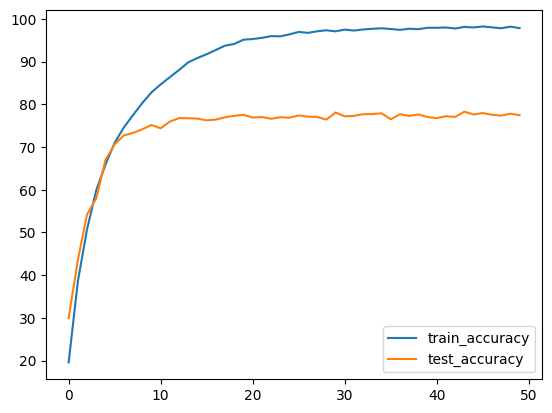

In [14]:
import matplotlib.pyplot as plt 

plt.plot(train_accuracies, label='train_accuracy')
plt.plot(test_accuracies, label='test_accuracy')
plt.legend()